In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = np.load("cleaned_data.npy")
data.shape

(24320,)

In [3]:
data = np.split(data,38)
data = np.array(data)
data.shape

(38, 640)

In [4]:
avg = np.empty(38)
for i in range(0,38):
    avg[i] = np.mean(data[i])
avg

array([4185.36151265, 4184.75141688, 4185.85692375, 4189.13373102,
       4180.41479962, 4187.55443177, 4184.80784632, 4184.96979293,
       4187.29038621, 4177.61961923, 4187.38076605, 4185.80868504,
       4183.55493382, 4180.40300042, 4184.62052479, 4191.76242254,
       4187.58198493, 4180.76614495, 4192.0023285 , 4187.80833678,
       4168.00053634, 4190.62335439, 4187.78576286, 4182.84107019,
       4189.75598717, 4183.54802447, 4182.6466444 , 4185.47525784,
       4184.14432395, 4185.87049216, 4186.4866997 , 4180.799008  ,
       4187.62456812, 4185.66159096, 4188.91315851, 4186.92430974,
       4180.75356091, 4180.30256194])

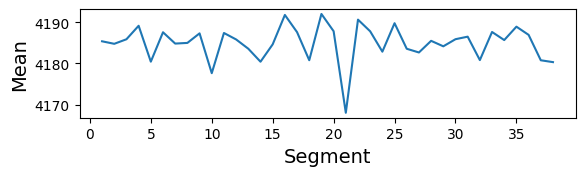

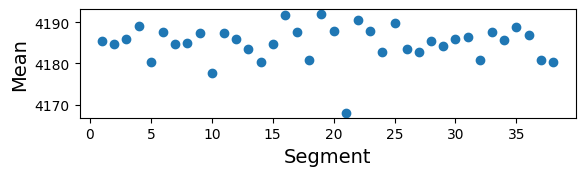

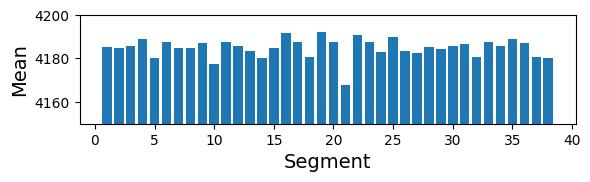

In [11]:
x = np.arange(1,39,1)


fig = plt.figure()
plt.subplot(3,1,1)
plt.ylabel("Mean", fontsize=14)
plt.xlabel("Segment", fontsize=14)
plt.plot(x , avg)
plt.show()
plt.subplot(3,1,2)
plt.ylabel("Mean", fontsize=14)
plt.xlabel("Segment", fontsize=14)
plt.scatter(x , avg)
plt.show()

plt.subplot(3,1,3)
plt.ylabel("Mean", fontsize=14)
plt.xlabel("Segment", fontsize=14)
plt.bar(x , avg)
plt.ylim(4150,4200)
plt.show()

In [60]:
odd_segments = np.empty([19,640])
even_segments = np.empty([19,640])

for i in range (0,19):
    odd_segments[i] = data[i*2]
    even_segments[i] = data[2*i+1]

In [61]:
even_segments.shape

(19, 640)

In [62]:
def hjroth_param(epoch):
    activity = np.var(epoch, axis=0)
    mobility = np.divide(np.std(np.diff(epoch, axis=0)), np.std(epoch, axis=0))
    complexity = np.divide(np.divide(np.std(np.diff(np.diff(epoch, axis=0), axis=0), axis=0), np.std(np.diff(epoch, axis=0), axis=0)) , mobility)
    return(activity,mobility,complexity)

In [92]:
o_param = np.empty([19,3])
e_param = np.empty([19,3])
for i in range (0,19):
    o_param[i] = hjroth_param(odd_segments[i])
    e_param[i] = hjroth_param(even_segments[i])

In [93]:
np.savetxt("os.csv", o_param, delimiter=",")
np.savetxt("es.csv", e_param, delimiter=",")
o_param = o_param.transpose()
e_param = e_param.transpose()

In [70]:
stats.ttest_ind(o_param[0],e_param[0])

Ttest_indResult(statistic=-2.2455133898013715, pvalue=0.03096871782887779)

In [74]:
stats.ttest_ind(o_param[1],e_param[1])

Ttest_indResult(statistic=2.4207878363466913, pvalue=0.020657280222313477)

In [75]:
stats.ttest_ind(o_param[2],e_param[2])

Ttest_indResult(statistic=-1.049669507650885, pvalue=0.30086590465019225)

In [100]:
all_seg = np.empty([38,3])

for i in range (0,38):
    all_seg[i] = hjroth_param(data[i])

np.savetxt("as.csv", all_seg, delimiter=",")
all_seg = all_seg.transpose()
all_seg[0]

array([ 765.23978154, 1000.54483452,  456.49598839, 1855.07572334,
        269.18000412, 1182.01850761,  156.59655232,  864.69931173,
        447.21685467,  634.21119978, 1132.45996481, 1195.67372215,
        936.37951982, 1010.55530692,  262.81323091,  448.90500841,
       1116.25173088,  823.80302119,  392.07572547, 1158.12522794,
        642.04112191, 1014.65572647,  191.10983101,  471.8691356 ,
        378.22343468,  414.70361424,  145.12610381,  583.46652281,
        154.57967203,  154.96206567,  212.14596238,  290.69579662,
        455.66733884,   67.60775124, 1024.35328839, 1285.74065336,
        783.43083255,  971.20837246])

In [103]:
np.corrcoef(all_seg)

array([[ 1.        , -0.54020674,  0.06017557],
       [-0.54020674,  1.        , -0.69449163],
       [ 0.06017557, -0.69449163,  1.        ]])

In [104]:
stats.ttest_ind(all_seg[0],all_seg[1])

Ttest_indResult(statistic=9.812427124308547, pvalue=4.937935671617358e-15)

In [105]:
stats.ttest_ind(all_seg[0],all_seg[2])

Ttest_indResult(statistic=9.784924713615863, pvalue=5.5589608025554555e-15)

In [106]:
stats.ttest_ind(all_seg[1],all_seg[2])

Ttest_indResult(statistic=-49.13406313725465, pvalue=3.064357006410068e-58)